In [2]:
# No Y-label/Target here because PCA is an Unsupervised Learning Technique
# We want to reduce the number of columns/dimensions
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns # visualize the correlation using this library
%matplotlib inline

In [3]:
data = pd.read_csv('LabourTrainingEvaluationData.csv')
data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
data.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [5]:
cat_columns = ["Eduacation", "Race", "Hisp","MaritalStatus"]
df_processed = pd.get_dummies(data, prefix_sep="__",
                              columns=cat_columns)
df_processed.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Eduacation__HighSchool,Eduacation__Intermediate,Eduacation__LessThanHighSchool,Eduacation__PostGraduate,Eduacation__graduate,Race__NotBlack,Race__black,Hisp__NotHispanic,Hisp__hispanic,MaritalStatus__Married,MaritalStatus__NotMarried
0,45,1,21516.670,25243.550,25564.670,0,0,1,0,0,1,0,1,0,1,0
1,21,0,3175.971,5852.565,13496.080,0,1,0,0,0,1,0,1,0,0,1
2,38,0,23039.020,25130.760,25564.670,1,0,0,0,0,1,0,1,0,1,0
3,48,1,24994.370,25243.550,25564.670,0,0,1,0,0,1,0,1,0,1,0
4,18,1,1669.295,10727.610,9860.869,0,0,1,0,0,1,0,1,0,1,0


Text(0.5, 1.0, 'Correlation between different fearures')

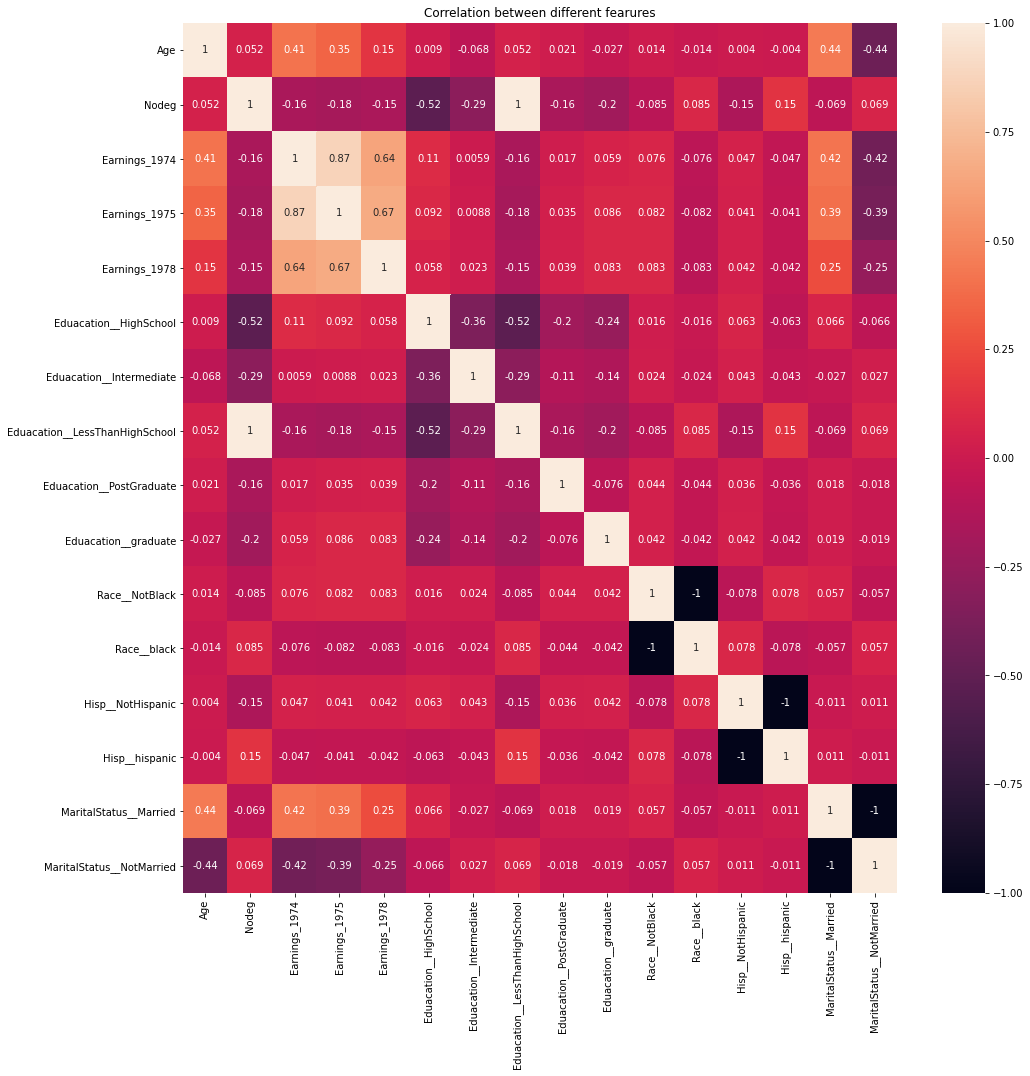

In [6]:
correlation = df_processed.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation, annot=True)

plt.title('Correlation between different fearures')

In [7]:
cols = df_processed.columns.tolist()
cols
# 16 columns in the data and we plan to reduce it to less number of columns

['Age',
 'Nodeg',
 'Earnings_1974',
 'Earnings_1975',
 'Earnings_1978',
 'Eduacation__HighSchool',
 'Eduacation__Intermediate',
 'Eduacation__LessThanHighSchool',
 'Eduacation__PostGraduate',
 'Eduacation__graduate',
 'Race__NotBlack',
 'Race__black',
 'Hisp__NotHispanic',
 'Hisp__hispanic',
 'MaritalStatus__Married',
 'MaritalStatus__NotMarried']

In [8]:
# The authors have considered nodeg as a binary y/target variable hence we need to drop it for the unsupervised learning exercise
cols.insert(0, cols.pop(cols.index('Nodeg')))
# pop nodeg column and reinsert at index 0
cols

['Nodeg',
 'Age',
 'Earnings_1974',
 'Earnings_1975',
 'Earnings_1978',
 'Eduacation__HighSchool',
 'Eduacation__Intermediate',
 'Eduacation__LessThanHighSchool',
 'Eduacation__PostGraduate',
 'Eduacation__graduate',
 'Race__NotBlack',
 'Race__black',
 'Hisp__NotHispanic',
 'Hisp__hispanic',
 'MaritalStatus__Married',
 'MaritalStatus__NotMarried']

In [10]:
df_processed = df_processed.reindex(columns= cols)
X = df_processed.iloc[:,1:16].values
y = df_processed.iloc[:,0].values # y is nowhere used further in the code which means that nodeg column is dropped
X

array([[4.500000e+01, 2.151667e+04, 2.524355e+04, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.100000e+01, 3.175971e+03, 5.852565e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [3.800000e+01, 2.303902e+04, 2.513076e+04, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [3.700000e+01, 1.733951e+03, 1.559371e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [4.700000e+01, 1.691435e+04, 1.138466e+04, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [4.000000e+01, 1.362866e+04, 1.314455e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [11]:
np.shape(X)
# X is in the form rows, columns (15992, 15)
#     X Y Z
#Row1 1 2 3
#ROw2 3 4 5

# When transposed .T does this
    # Row1 Row2
# X  1    3
# Y  2    4
# Z  3    5



(15992, 15)

In [ ]:
# PCA starts

In [12]:
X_std = StandardScaler().fit_transform(X)

In [13]:
X_std
# After scaling we get the right picture of the variance of variables, so if variance of column1 is greater than
# variance of column 2 after standardization, that actually means information in variable1 > variable2

array([[ 1.06608425,  0.78372666,  1.25055068, ..., -0.27861808,
         0.63641612, -0.63641612],
       [-1.10687017, -1.13285261, -0.84122362, ..., -0.27861808,
        -1.57129898,  1.57129898],
       [ 0.43230588,  0.94281026,  1.23838363, ..., -0.27861808,
         0.63641612, -0.63641612],
       ...,
       [ 0.34176611, -1.28354183, -1.30434568, ..., -0.27861808,
        -1.57129898,  1.57129898],
       [ 1.24716378,  0.30279019, -0.24445692, ..., -0.27861808,
         0.63641612, -0.63641612],
       [ 0.61338541, -0.04056016, -0.05461135, ..., -0.27861808,
        -1.57129898,  1.57129898]])

In [14]:
# np.cov(takes data is the form of columns, rows)
cov_mat = np.cov(X_std.T) # .T does the transpose of the table form rows, columns to columns, rows

In [15]:
cov_mat

array([[ 1.00006254,  0.40752536,  0.3498609 ,  0.15428374,  0.00903673,
        -0.06819027,  0.05237946,  0.02092388, -0.02735631,  0.01431403,
        -0.01431403,  0.00403978, -0.00403978,  0.43986354, -0.43986354],
       [ 0.40752536,  1.00006254,  0.87023551,  0.639374  ,  0.10689536,
         0.0059022 , -0.16377797,  0.01663984,  0.0589226 ,  0.07626292,
        -0.07626292,  0.04702801, -0.04702801,  0.42135102, -0.42135102],
       [ 0.3498609 ,  0.87023551,  1.00006254,  0.6683513 ,  0.0919983 ,
         0.00882574, -0.17639595,  0.03531327,  0.08593585,  0.08235836,
        -0.08235836,  0.04091383, -0.04091383,  0.39484929, -0.39484929],
       [ 0.15428374,  0.639374  ,  0.6683513 ,  1.00006254,  0.05829846,
         0.02280973, -0.15195206,  0.03915317,  0.0828689 ,  0.08294377,
        -0.08294377,  0.04187961, -0.04187961,  0.25155438, -0.25155438],
       [ 0.00903673,  0.10689536,  0.0919983 ,  0.05829846,  1.00006254,
        -0.3617571 , -0.51933209, -0.19954781, 

In [16]:
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 1.00006254  0.40752536  0.3498609   0.15428374  0.00903673 -0.06819027
   0.05237946  0.02092388 -0.02735631  0.01431403 -0.01431403  0.00403978
  -0.00403978  0.43986354 -0.43986354]
 [ 0.40752536  1.00006254  0.87023551  0.639374    0.10689536  0.0059022
  -0.16377797  0.01663984  0.0589226   0.07626292 -0.07626292  0.04702801
  -0.04702801  0.42135102 -0.42135102]
 [ 0.3498609   0.87023551  1.00006254  0.6683513   0.0919983   0.00882574
  -0.17639595  0.03531327  0.08593585  0.08235836 -0.08235836  0.04091383
  -0.04091383  0.39484929 -0.39484929]
 [ 0.15428374  0.639374    0.6683513   1.00006254  0.05829846  0.02280973
  -0.15195206  0.03915317  0.0828689   0.08294377 -0.08294377  0.04187961
  -0.04187961  0.25155438 -0.25155438]
 [ 0.00903673  0.10689536  0.0919983   0.05829846  1.00006254 -0.3617571
  -0.51933209 -0.19954781 -0.24495905  0.01608081 -0.01608081  0.06263816
  -0.06263816  0.0659962  -0.0659962 ]
 [-0.06819027  0.0059022   0.00882574  0.

Text(0.5, 1.0, 'Correlation between different features')

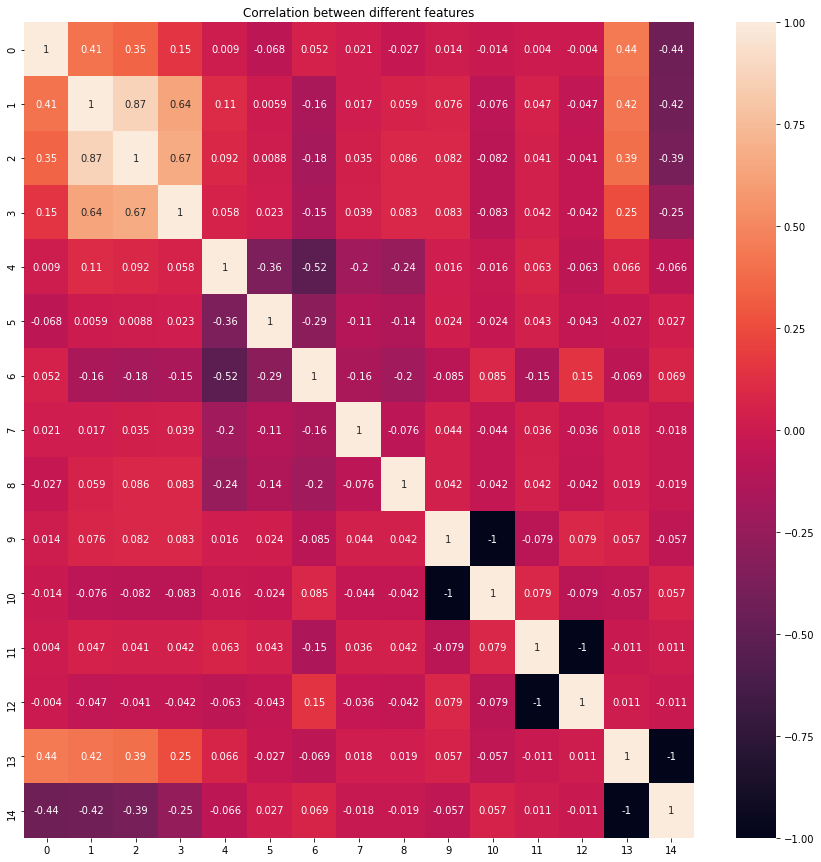

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(cov_mat, annot=True)

plt.title('Correlation between different features')

In [18]:
# PCA
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #SVD is happening behind the screen inside the eig function

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.98453199e-01  1.50373051e-02  1.78823339e-01 -4.81740333e-02
  -3.04166867e-01  8.41482665e-01 -1.45879478e-01  2.04084064e-01
   4.46025148e-02  1.03884527e-01  8.83049503e-03  4.88067532e-17
  -4.17457537e-17  3.09024052e-17  1.32363458e-17]
 [ 4.50962086e-01 -3.88914799e-02  1.83671697e-02  7.04119556e-01
   4.19616019e-01  7.81831308e-02  5.65642281e-02 -2.69413580e-01
   1.28933566e-01  1.49852661e-01  4.41120131e-02  3.40247017e-16
   5.19418514e-16 -3.33061762e-16 -1.43732329e-17]
 [ 4.43375967e-01 -3.56255539e-02  1.51404221e-03 -7.07239753e-01
   4.02653696e-01  1.12802496e-02  6.13108062e-02 -3.14178384e-01
   1.41308642e-01  1.28787908e-01  2.60660239e-02 -6.74789884e-16
  -3.72505291e-16  2.31592835e-16 -7.71364732e-17]
 [ 3.53525846e-01 -3.50798868e-02 -5.02259781e-02  3.40628383e-02
  -7.52485488e-01 -2.99685773e-01  7.48138294e-02 -4.01793371e-01
   1.67099721e-01  1.37147115e-01  1.71262549e-02 -1.35728133e-16
   7.55974584e-17 -4.83733358e-17  2.1499

In [ ]:
# Negative eigen values should not occur in eig_vals theoretically, but still we see that in code because of limitations 
# in decimal operations of the computer. We just drop the negative eigen values assuming them to be = 0

In [19]:
sorted(eig_vals, reverse=True)

[3.508121899191304,
 2.1743655293289774,
 1.9436935697491635,
 1.4607903384976928,
 1.3959986607828636,
 1.1941834983511046,
 1.0810128458486365,
 1.0662245880356724,
 0.6889964281385544,
 0.36111635263690495,
 0.1264343170796614,
 1.495862164886267e-17,
 2.8117529520667676e-34,
 -1.2740098522626614e-17,
 -4.798359139554407e-16]

In [20]:
eig_pairs = [] # empty list

for i in range(len(eig_vals)):
    if eig_vals[i] >= 0: # to remove or not to store the negative eigen values
        eig_pairs.append((eig_vals[i], eig_vecs[:,i])) #appending a tuple

# Sort the (eigenvalue, eigenvector) tuples from high to low
# def return_key(x);
#     return x[0]
# eig_pairs.sort(key=return_key(x), reverse=True) # work in every item of the eig_pairs list, and every such item is a tuple

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0]) #i[1] is stored as the eigenvector

Eigenvalues in descending order:
3.508121899191304
2.1743655293289774
1.9436935697491635
1.4607903384976928
1.3959986607828636
1.1941834983511046
1.0810128458486365
1.0662245880356724
0.6889964281385544
0.36111635263690495
0.1264343170796614
1.495862164886267e-17
2.8117529520667676e-34


In [21]:
eig_vals = np.zeros(len(eig_pairs))
for i in range(len(eig_pairs)):
    eig_vals[i] = eig_pairs[i][0]

In [22]:
eig_vals

array([3.50812190e+00, 2.17436553e+00, 1.94369357e+00, 1.46079034e+00,
       1.39599866e+00, 1.19418350e+00, 1.08101285e+00, 1.06622459e+00,
       6.88996428e-01, 3.61116353e-01, 1.26434317e-01, 1.49586216e-17,
       2.81175295e-34])

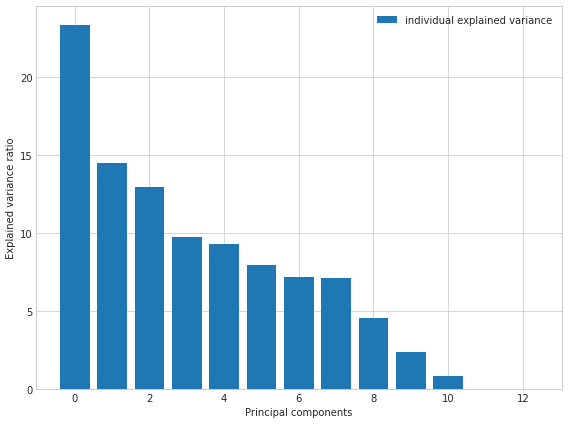

In [23]:
tot = sum(eig_vals)
var_exp = [] # empty list
for i in sorted(eig_vals, reverse=True):
    var_exp.append((i / tot)*100) # find the percentage of explained variance/imformation by eigen value

cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(len(eig_vals)), var_exp, label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

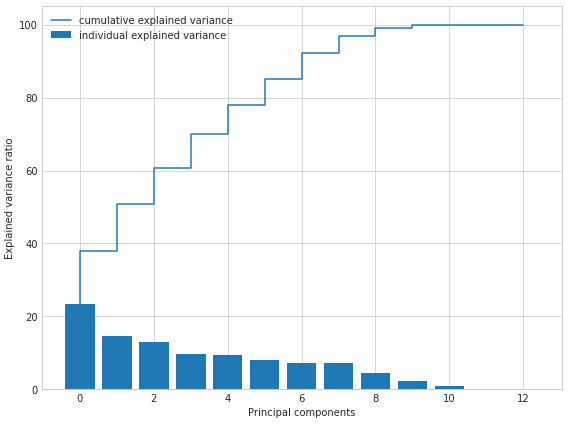

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(len(eig_vals)), var_exp, label='individual explained variance')
    plt.step(range(len(eig_vals)), cum_var_exp, label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(15,1), 
                      eig_pairs[1][1].reshape(15,1),
                      eig_pairs[2][1].reshape(15,1), 
                      eig_pairs[3][1].reshape(15,1),
                      eig_pairs[4][1].reshape(15,1), 
                      eig_pairs[5][1].reshape(15,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.2984532   0.01503731  0.17882334 -0.14587948  0.20408406  0.04460251]
 [ 0.45096209 -0.03889148  0.01836717  0.05656423 -0.26941358  0.12893357]
 [ 0.44337597 -0.03562555  0.00151404  0.06131081 -0.31417838  0.14130864]
 [ 0.35352585 -0.03507989 -0.05022598  0.07481383 -0.40179337  0.16709972]
 [ 0.09163011 -0.10747233 -0.12248273  0.72951045  0.30528198  0.02039864]
 [-0.00913968 -0.03168843 -0.10706148 -0.23193273 -0.33996774 -0.7607777 ]
 [-0.13340731  0.15552932  0.30828116 -0.42838179  0.11111108  0.42407   ]
 [ 0.02832835 -0.00622015 -0.07057346 -0.1461959  -0.03408144  0.06127637]
 [ 0.04635998 -0.01860021 -0.08667862 -0.14014218 -0.22955639  0.24124612]
 [ 0.10659162  0.39287888 -0.5403966  -0.1152026   0.13810462  0.05348188]
 [-0.10659162 -0.39287888  0.5403966   0.1152026  -0.13810462 -0.05348188]
 [ 0.03829408 -0.5686637  -0.29861481 -0.2151105   0.15477714  0.08139319]
 [-0.03829408  0.5686637   0.29861481  0.2151105  -0.15477714 -0.08139319]
 [ 0.40688501 

In [26]:
Y = X_std.dot(matrix_w) # matrix_w is eigenvectors, X_std is the original data and we are multiplying X_std/original data with eigenvectors
Y.shape #Y is the dimension reduced 80% information containing transformed data

(15992, 6)

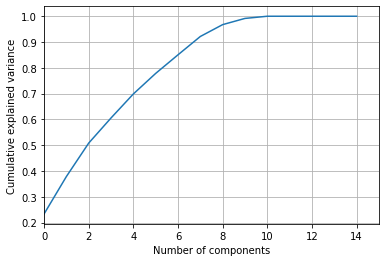

In [28]:
from sklearn.decomposition import PCA #PCA algorithm in sklearn

pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,15,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

In [29]:
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std) #Running  codes from 28 to 31 is sufficient we dont need to run all above codes.

In [30]:
Y_sklearn.shape

(15992, 6)

In [31]:
Y_sklearn

array([[-1.92180171,  0.20478214,  0.58241463, -1.3697058 ,  0.0468458 ,
        -1.20358048],
       [ 2.48938375, -0.2359512 , -1.56133313, -0.46571484,  1.57000815,
         1.64780799],
       [-2.27906813, -0.37151014, -0.45446184,  1.16459084, -0.16695795,
        -0.30678036],
       ...,
       [ 2.4580369 , -0.29383953, -1.22301473,  1.3275423 , -0.83009224,
        -0.2415804 ],
       [-0.66029131,  0.32271568,  0.66561651, -1.6072145 , -1.08470239,
        -0.73239353],
       [ 1.60469503,  0.16472467, -0.24283973, -0.96959733,  0.38068645,
        -1.54297038]])

In [ ]:
# In practice, we should take that number of principal components so that they will explain more than 95% information of the original data